#### A long simulation designed to measure the long-term behaviour of fitness in range expansions 


In [1]:
include("../resk.jl")

RESK successfully loaded.


For a simpler calculation, it is sometimes viable to simulate a range expansion using the infinite sites model. Simply use the suffix *_inf* for infinite-sites simulations:

In [2]:
test = rangeexp_1d(100,100,5;x_max_burnin=5,x_max_exp=100,data_to_generate="FPSN",k_capacity=100)

It is much faster, although it ignores the biallelic structure, hence there is no dominance coefficient. Instead of *n_loci*, it has *n_segr_regions*; and instead of *n_sel_loci*, it has *prop_of_sel_loci*:

In [ ]:
test["stats"]

In [ ]:
re_heatmap(test["pops"][:,:,5],1,149,150;clim=(0,100))

In [ ]:
re_heatmap(test["pops"][:,:,4],1,149,150;clim=(0,100))

The colour maximum for this graph was determined automatically, but 40 is actually twice the capacity, and while single demes' populations sometimes exceed the capacity, it might be easier to look at the graph where the maximum is the capacity. For this, we have a special function:

In [ ]:
test = rangeexp_1d_inf(100,100,1;x_max_burnin=5,x_max_exp=100,data_to_generate="F",k_capacity=100)

In [ ]:
re_heatmap(test["fitn"][:,:,1],1,199,200)

In [ ]:
test = rangeexp_1d_inf(10000,2500;x_max_burnin=5,x_max_exp=500,data_to_generate="FP",k_capacity=100)

In [ ]:
re_heatmap(test["pops"][:,:,1],1,11600,11602;clim=(0,100),yshowaxis=false)

In [ ]:
re_heatmap_pops(test)

In [ ]:
re_heatmap_aasel(test)

In [ ]:
re_heatmap_aasel(test;clim=(450,550),slow_factor=0.5)

In [ ]:
re_heatmap_fitn(test;clim=(0.9,1.0))

Notice how the fitness distribution gets higher (brighter) overall, after the whole space has been filled and the expansion is essentially stopped.

This can be confirmed with the mean fitness graphs:

In [ ]:
re_heatmap(test,"fitn")

In [ ]:
test_fitn_frontarr = front_array(test,"fitn";oneside=true)
re_heatmap(test_fitn_frontarr,1,10000,10200;yshowaxis=false)

In [ ]:
test_fitn_frontav = average_front(test,"fitn")

In [ ]:
Plots.plot(test_fitn_frontav,xlabel="Generation",label="Mean front fitness")

In [ ]:
test_norm = norm_onset_mean(test["fitn"],1,10000)

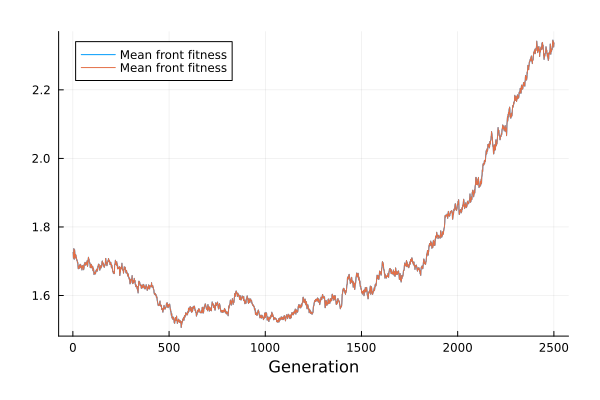

In [51]:
Plots.plot!(test_fitn_frontav[10000:12500],xlabel="Generation",label="Mean front fitness")

In [5]:
test_fitn_av = average_all(test,"fitn")
Plots.plot(test_fitn_av,xlabel="Generation",label="Mean front fitness")

MethodError: MethodError: no method matching average_all(::SharedArray{Float32, 3}, ::Int64, ::Int64)

Closest candidates are:
  average_all(!Matched::Array, ::Int64, ::Int64)
   @ Main d:\Coding\RESK\programs\resk.jl:1882
